## Importing Packages

In [1]:
import pandas as pd
import numpy as np
#for spliting train and test data 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
#for decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
#for placing metrics on decisiion tree
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

In [2]:
pip install uszipcode

Note: you may need to restart the kernel to use updated packages.


In [3]:
customers = pd.read_csv("Loan_Modelling.csv")

In [4]:
data=customers.copy()

## Checking the data 

In [5]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [7]:
data.shape

(5000, 14)

The data has 5000 rows and 14 coloumns

In [8]:
data[data.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
data.ZIPCode.nunique()

467

In [10]:
unqzip=data.ZIPCode.nunique()

In [11]:
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True) 

In [12]:
data['County'] = data['ZIPCode'].apply(lambda x: search.by_zipcode(x).county)

In [13]:
data['County'].value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Kern County                 54
Marin County                54
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Tuolumne County              7
Siskiyou

In [14]:
data[data['County'].isnull()]['ZIPCode'].unique()

array([92717, 93077, 92634, 96651])

In [15]:
data.loc[data.isin({'ZIPCode' : [92717, 92634]})['ZIPCode'], 'County'] = 'Orange County'
data.loc[data.isin({'ZIPCode' : [93077]})['ZIPCode'], 'County'] = '93077'
data.loc[data.isin({'ZIPCode' : [96651]})['ZIPCode'], 'County'] = '96651'


In [16]:
data[data['County'].isnull()]['ZIPCode'].unique()

array([], dtype=int64)

In [17]:
data['County'] = data['County'].astype('category')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   int64   
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   int64   
 10  Securities_Account  5000 non-null   int64   
 11  CD_Account          5000 non-null   int64   
 12  Online              5000 non-null   int64   
 13  CreditCard          5000 non-null   int64   
 14  County              5000 non-null   category
dtypes: category(1), float64(1), int64(13)


The data has no duplicate rows

In [19]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# Insights: 
We see that all the data types here are integers or decimals

The most frequent data type is int64

In [20]:
cat_columns = ["Online", "Personal_Loan", "Securities_Account", "CD_Account","CreditCard","Family","Education"]
for i in cat_columns:
    print(data[i].value_counts())
    print("*" * 50)

1    2984
0    2016
Name: Online, dtype: int64
**************************************************
0    4520
1     480
Name: Personal_Loan, dtype: int64
**************************************************
0    4478
1     522
Name: Securities_Account, dtype: int64
**************************************************
0    4698
1     302
Name: CD_Account, dtype: int64
**************************************************
0    3530
1    1470
Name: CreditCard, dtype: int64
**************************************************
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
**************************************************
1    2096
3    1501
2    1403
Name: Education, dtype: int64
**************************************************


# Data Description
Here in coloumns Online, Peronal_Loan, Securities_Account, CD_Account and Credit Card 1== True, 0== False

Around of the users do not a have a Peronal and securities account

More than 90% of the users do not have a certificate of depoit account

1470 users use a credit card issued by other banks

Most number of the users have the highest level of education as undergraduate


In [21]:
data["ID"].nunique()
#all are unique

5000

In [22]:
data.drop(["ID"], axis=1, inplace=True)

Since there are 5000 rows in ID as well, we do not need the column

In [23]:
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County


# Checking for missing Values

In [24]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
County                0
dtype: int64

There are no missing values

# Summary

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


# EDA
# Univariative Analysis

# Histogram & Boxplot

In [26]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

# Age

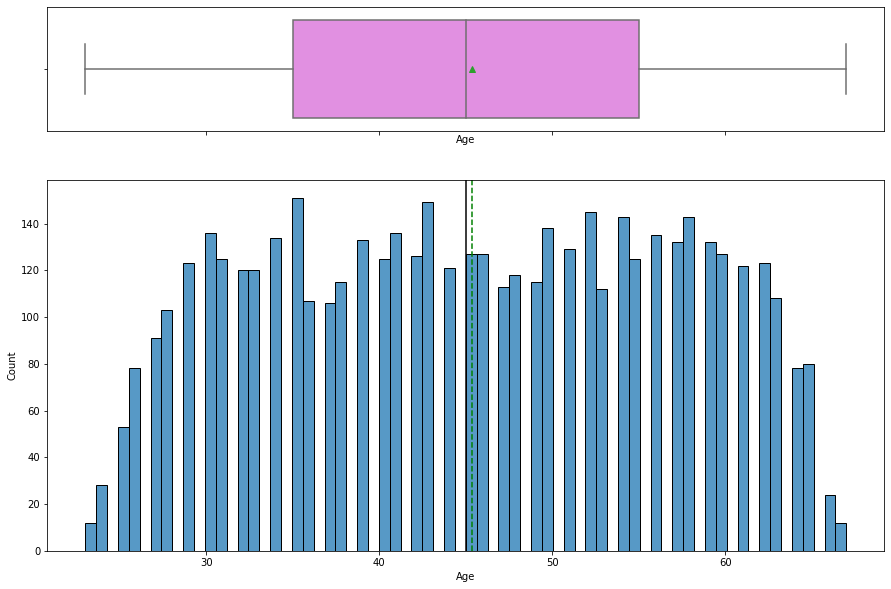

In [27]:
histogram_boxplot(data,"Age",bins=70)

Here we see the median age group to be 45

# Experience

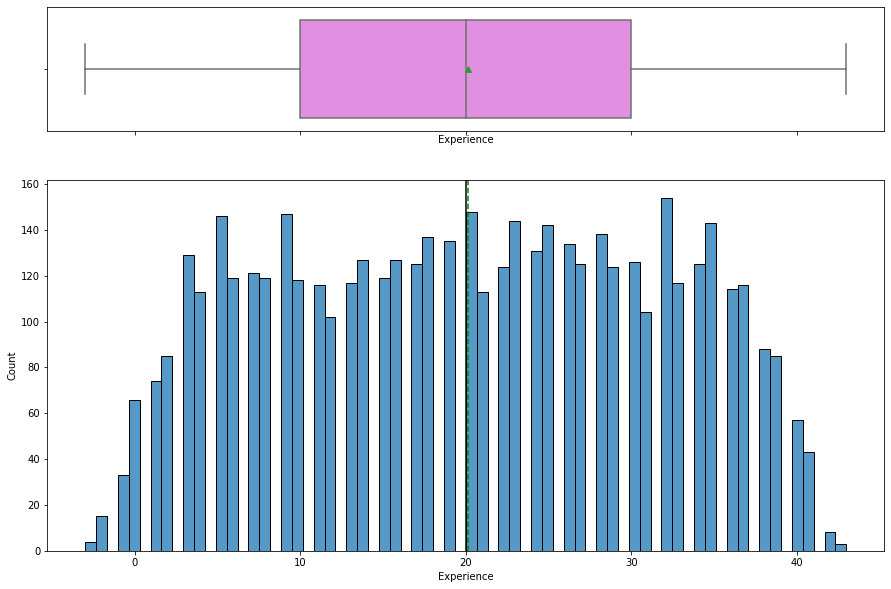

In [28]:
histogram_boxplot(data,"Experience",bins=70)

The graph is fairly distibuted with the median years of experience being 20

# Income

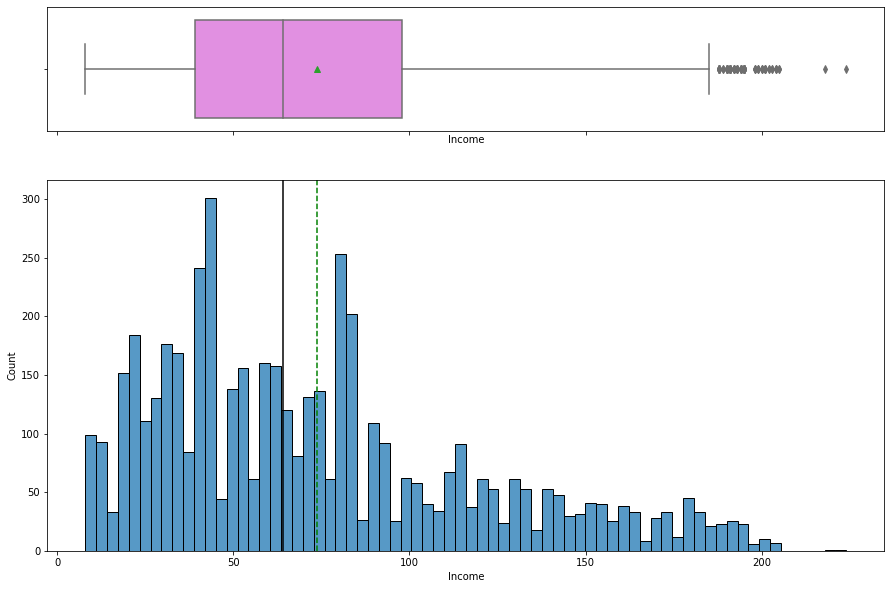

In [29]:
histogram_boxplot(data,"Income",bins=70)

Here the meidan income is around $70000

# ZipCode

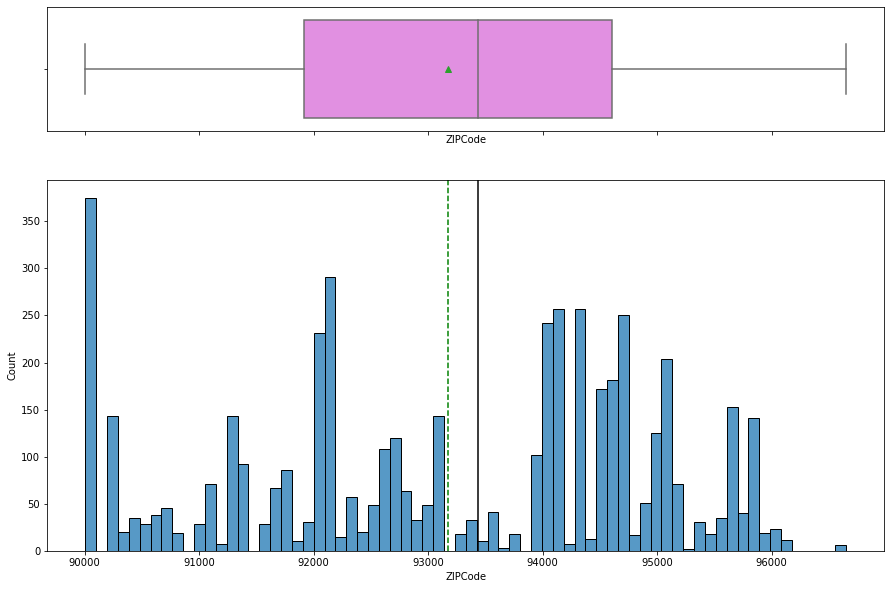

In [30]:
histogram_boxplot(data,"ZIPCode",bins=70)

# Family Members

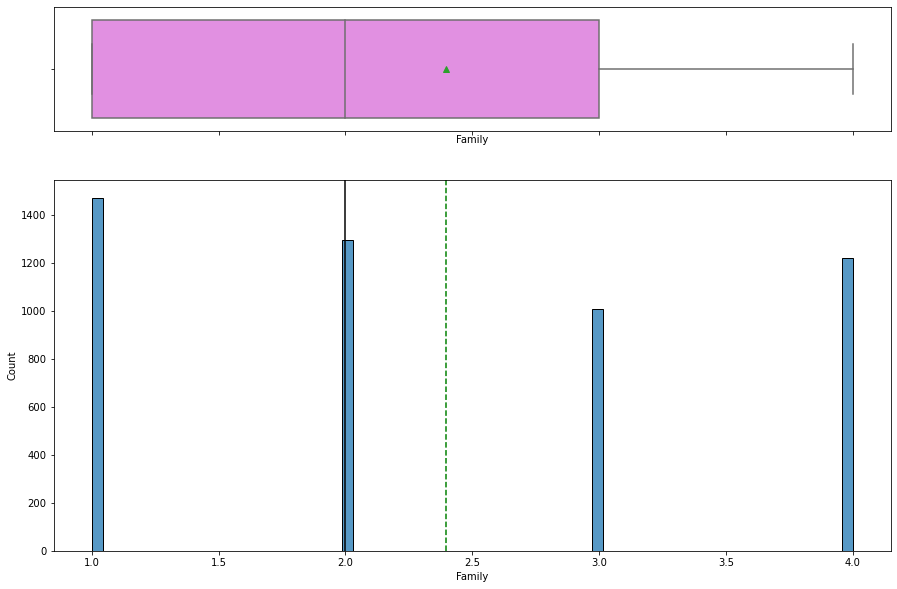

In [31]:
histogram_boxplot(data,"Family",bins=70)

Most users have 1 family member with the median being around 2.4 family memebers

# Education

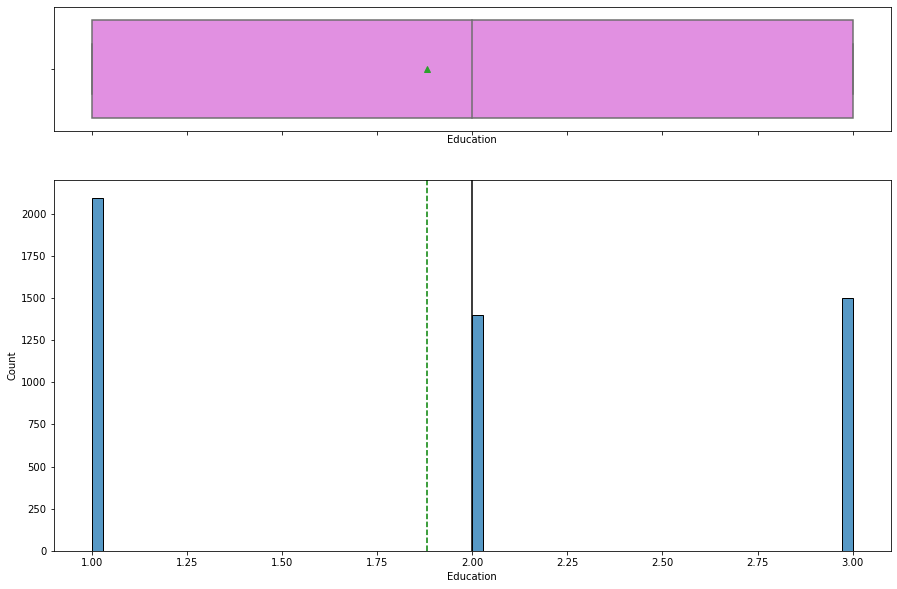

In [32]:
histogram_boxplot(data,"Education",bins=70)

The most number of users are undergraduates

# Mortgage

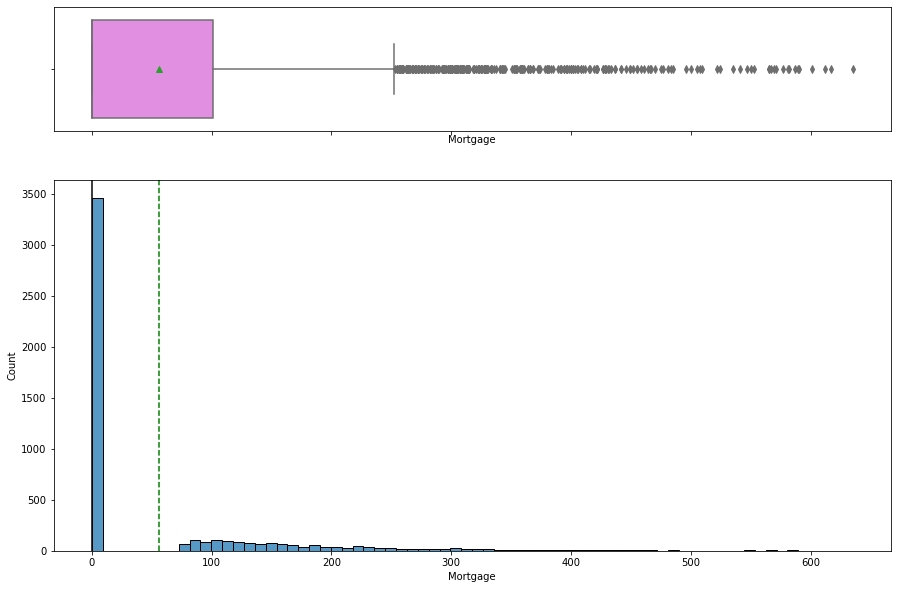

In [33]:
histogram_boxplot(data,"Mortgage",bins=70)

# Credit Card Average

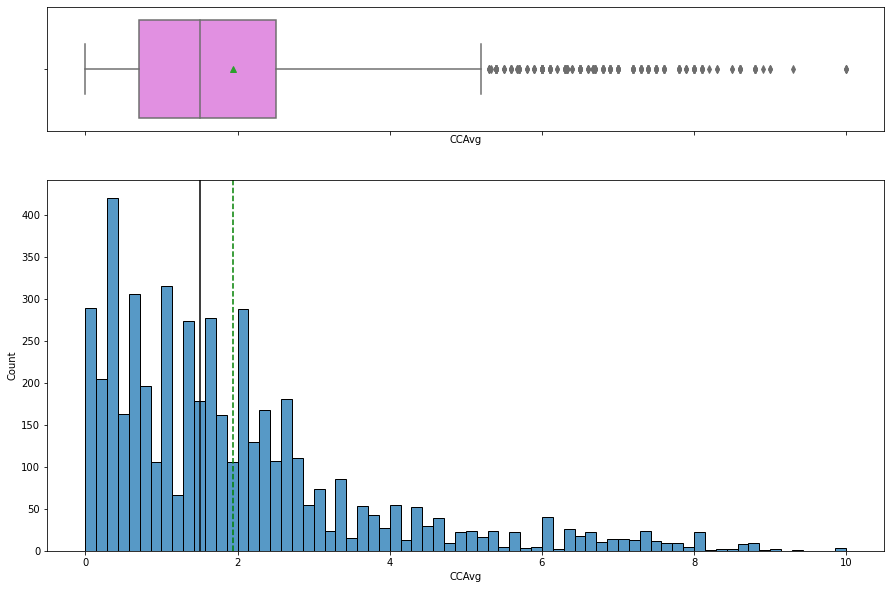

In [34]:
histogram_boxplot(data,"CCAvg",bins=70)

On an average the credit card users spend $1600 

# Bar plots

In [35]:

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

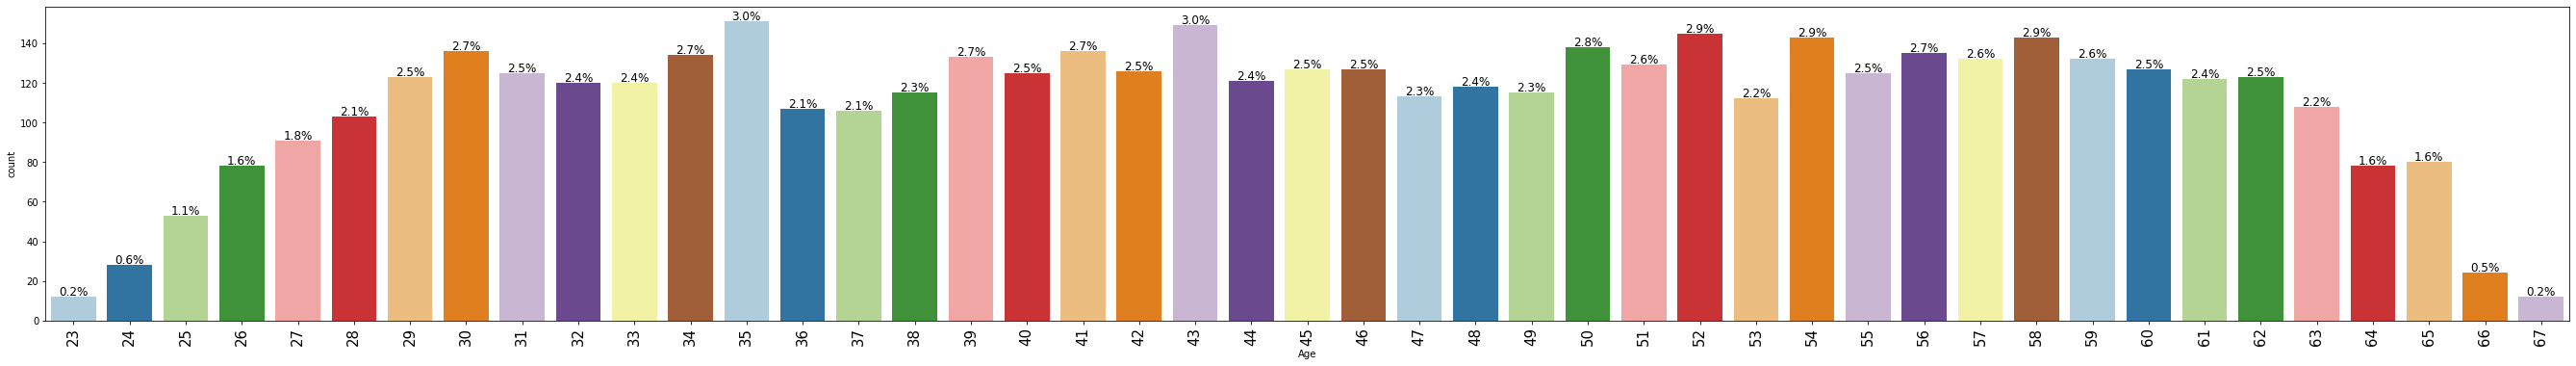

In [36]:
labeled_barplot(data, "Age", perc=True)

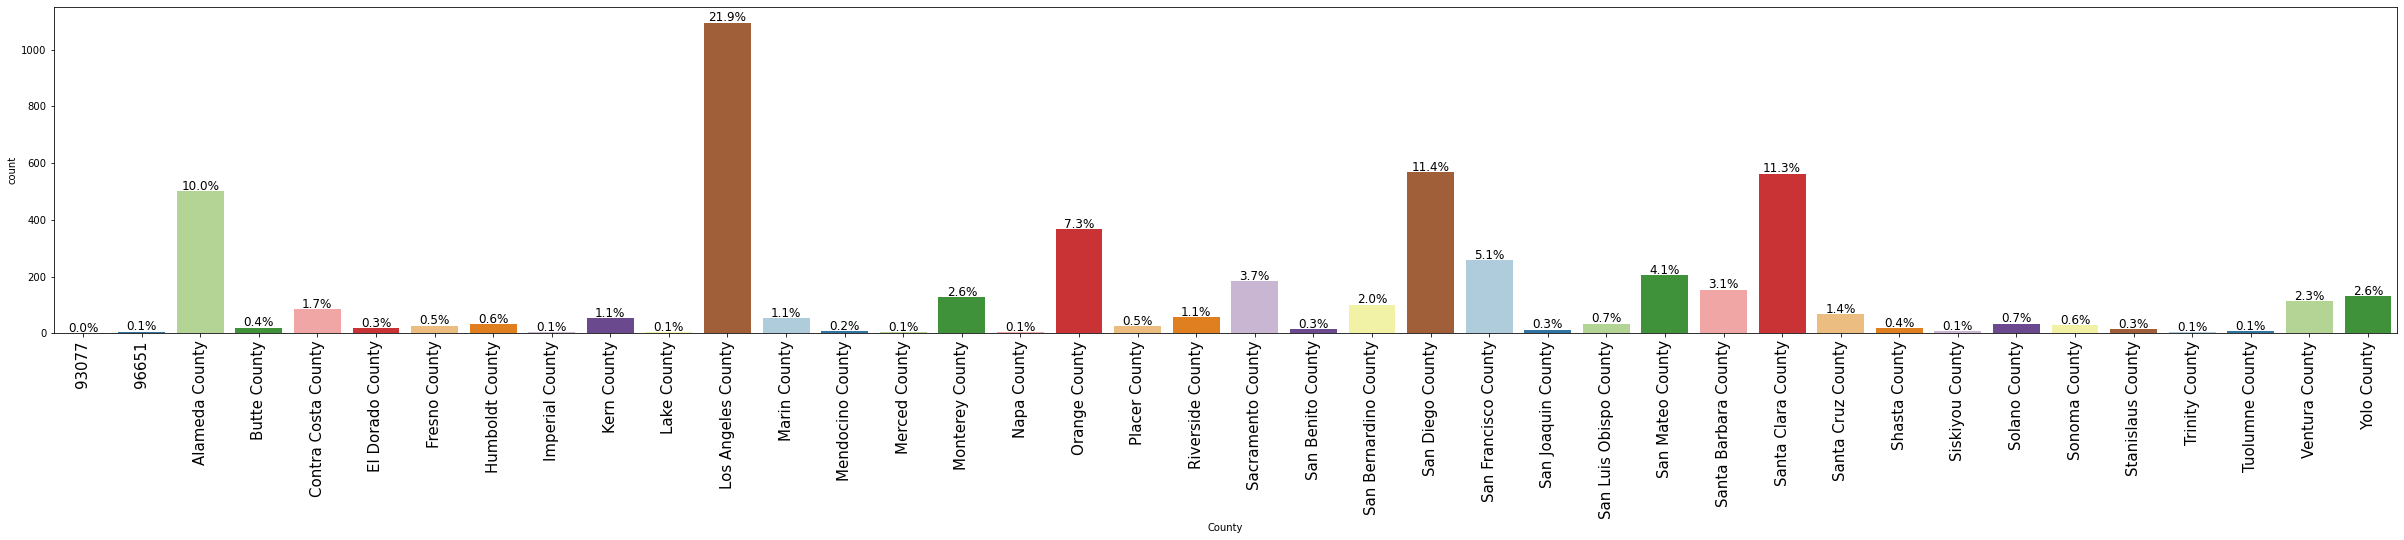

In [37]:
labeled_barplot(data, "County", perc=True)

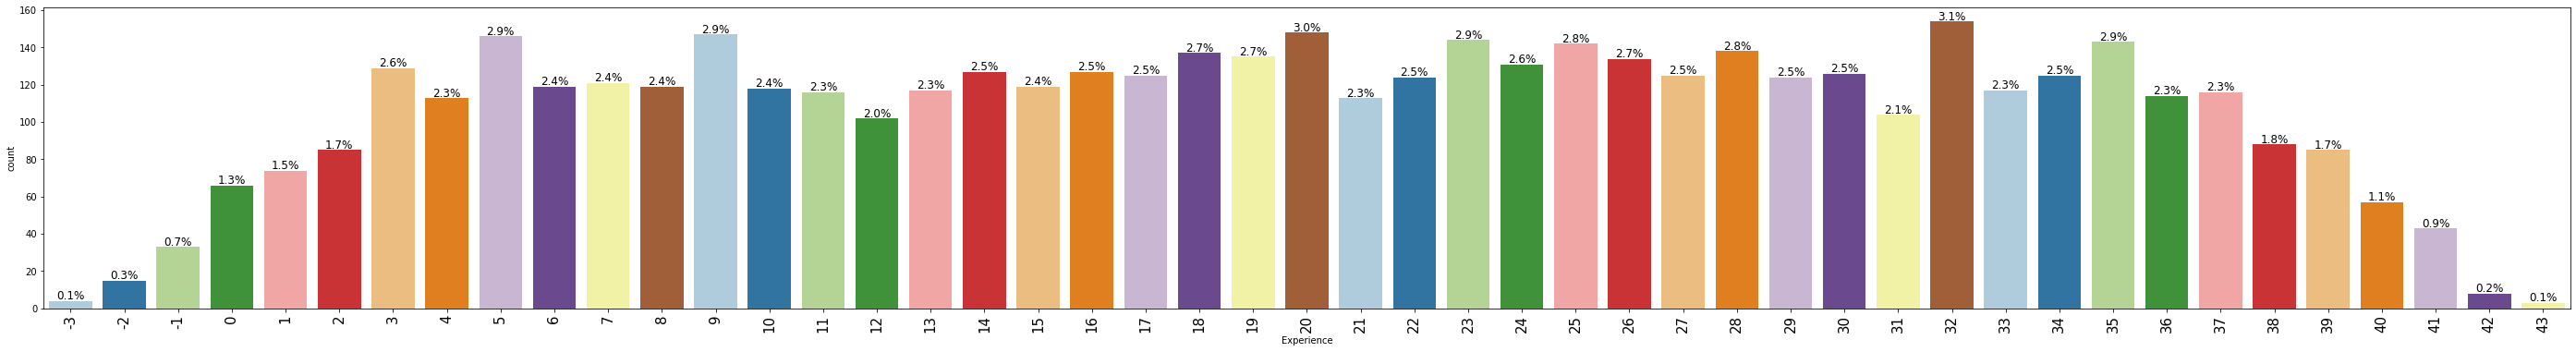

In [38]:
labeled_barplot(data, "Experience", perc=True)

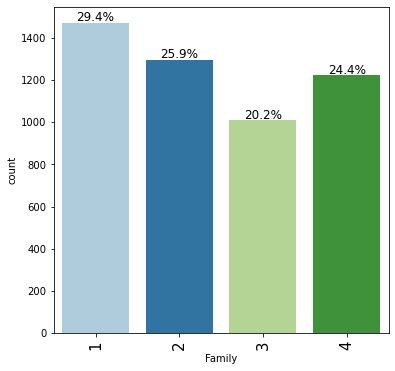

In [39]:
labeled_barplot(data, "Family", perc=True)

29.4% of the users have 1 Family member

25.9% of the users have 2 Family memebers

20.2% of the users have 3 Family members

24.4% of the users have 4 family memebers

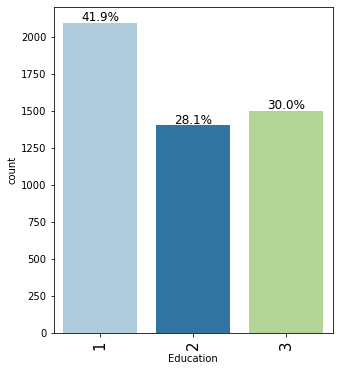

In [40]:
labeled_barplot(data, "Education", perc=True)

41.9% of the users have  undegratude
28.1% of the users have Grauate
30% of the users have Advanced/Professional

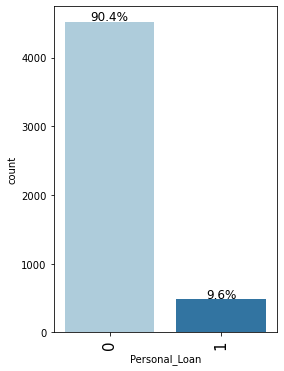

In [41]:
labeled_barplot(data, "Personal_Loan", perc=True)

90.4% of the users do not have a Persoanl Loan

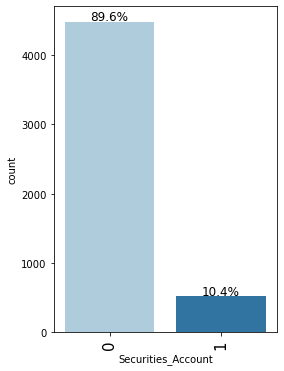

In [42]:
labeled_barplot(data, "Securities_Account", perc=True)

89.6% of the users do not have a securities account

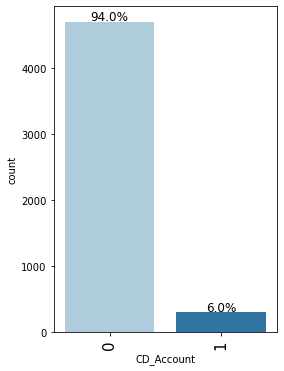

In [43]:
labeled_barplot(data, "CD_Account", perc=True)

94% of the users do not have a certificate of deposit account

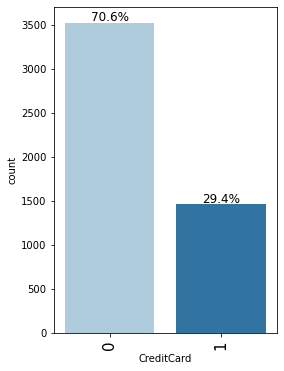

In [44]:
labeled_barplot(data, "CreditCard", perc=True)

29.4% of the users have a credit card with other banks

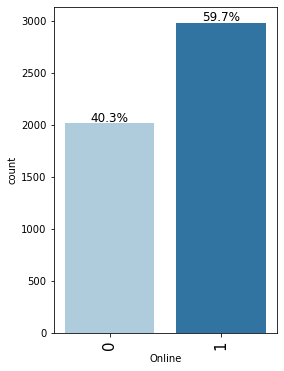

In [45]:
labeled_barplot(data, "Online", perc=True)

59.7% of the users use online banking facilities

# Bivariative Analysis

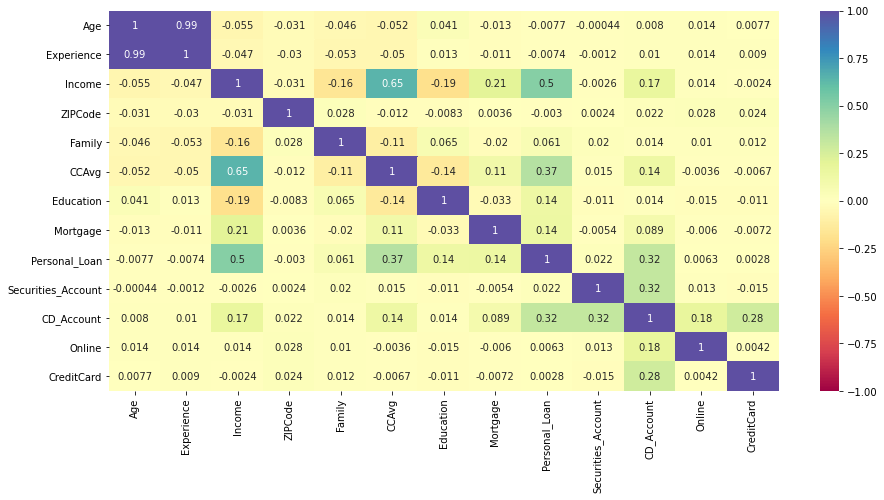

In [46]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

Here we notice that the Personal_Loan and Income are fairly correlated, followed by the Credit Card Average

We also notice that the income and the Credit card average are significantly correlated

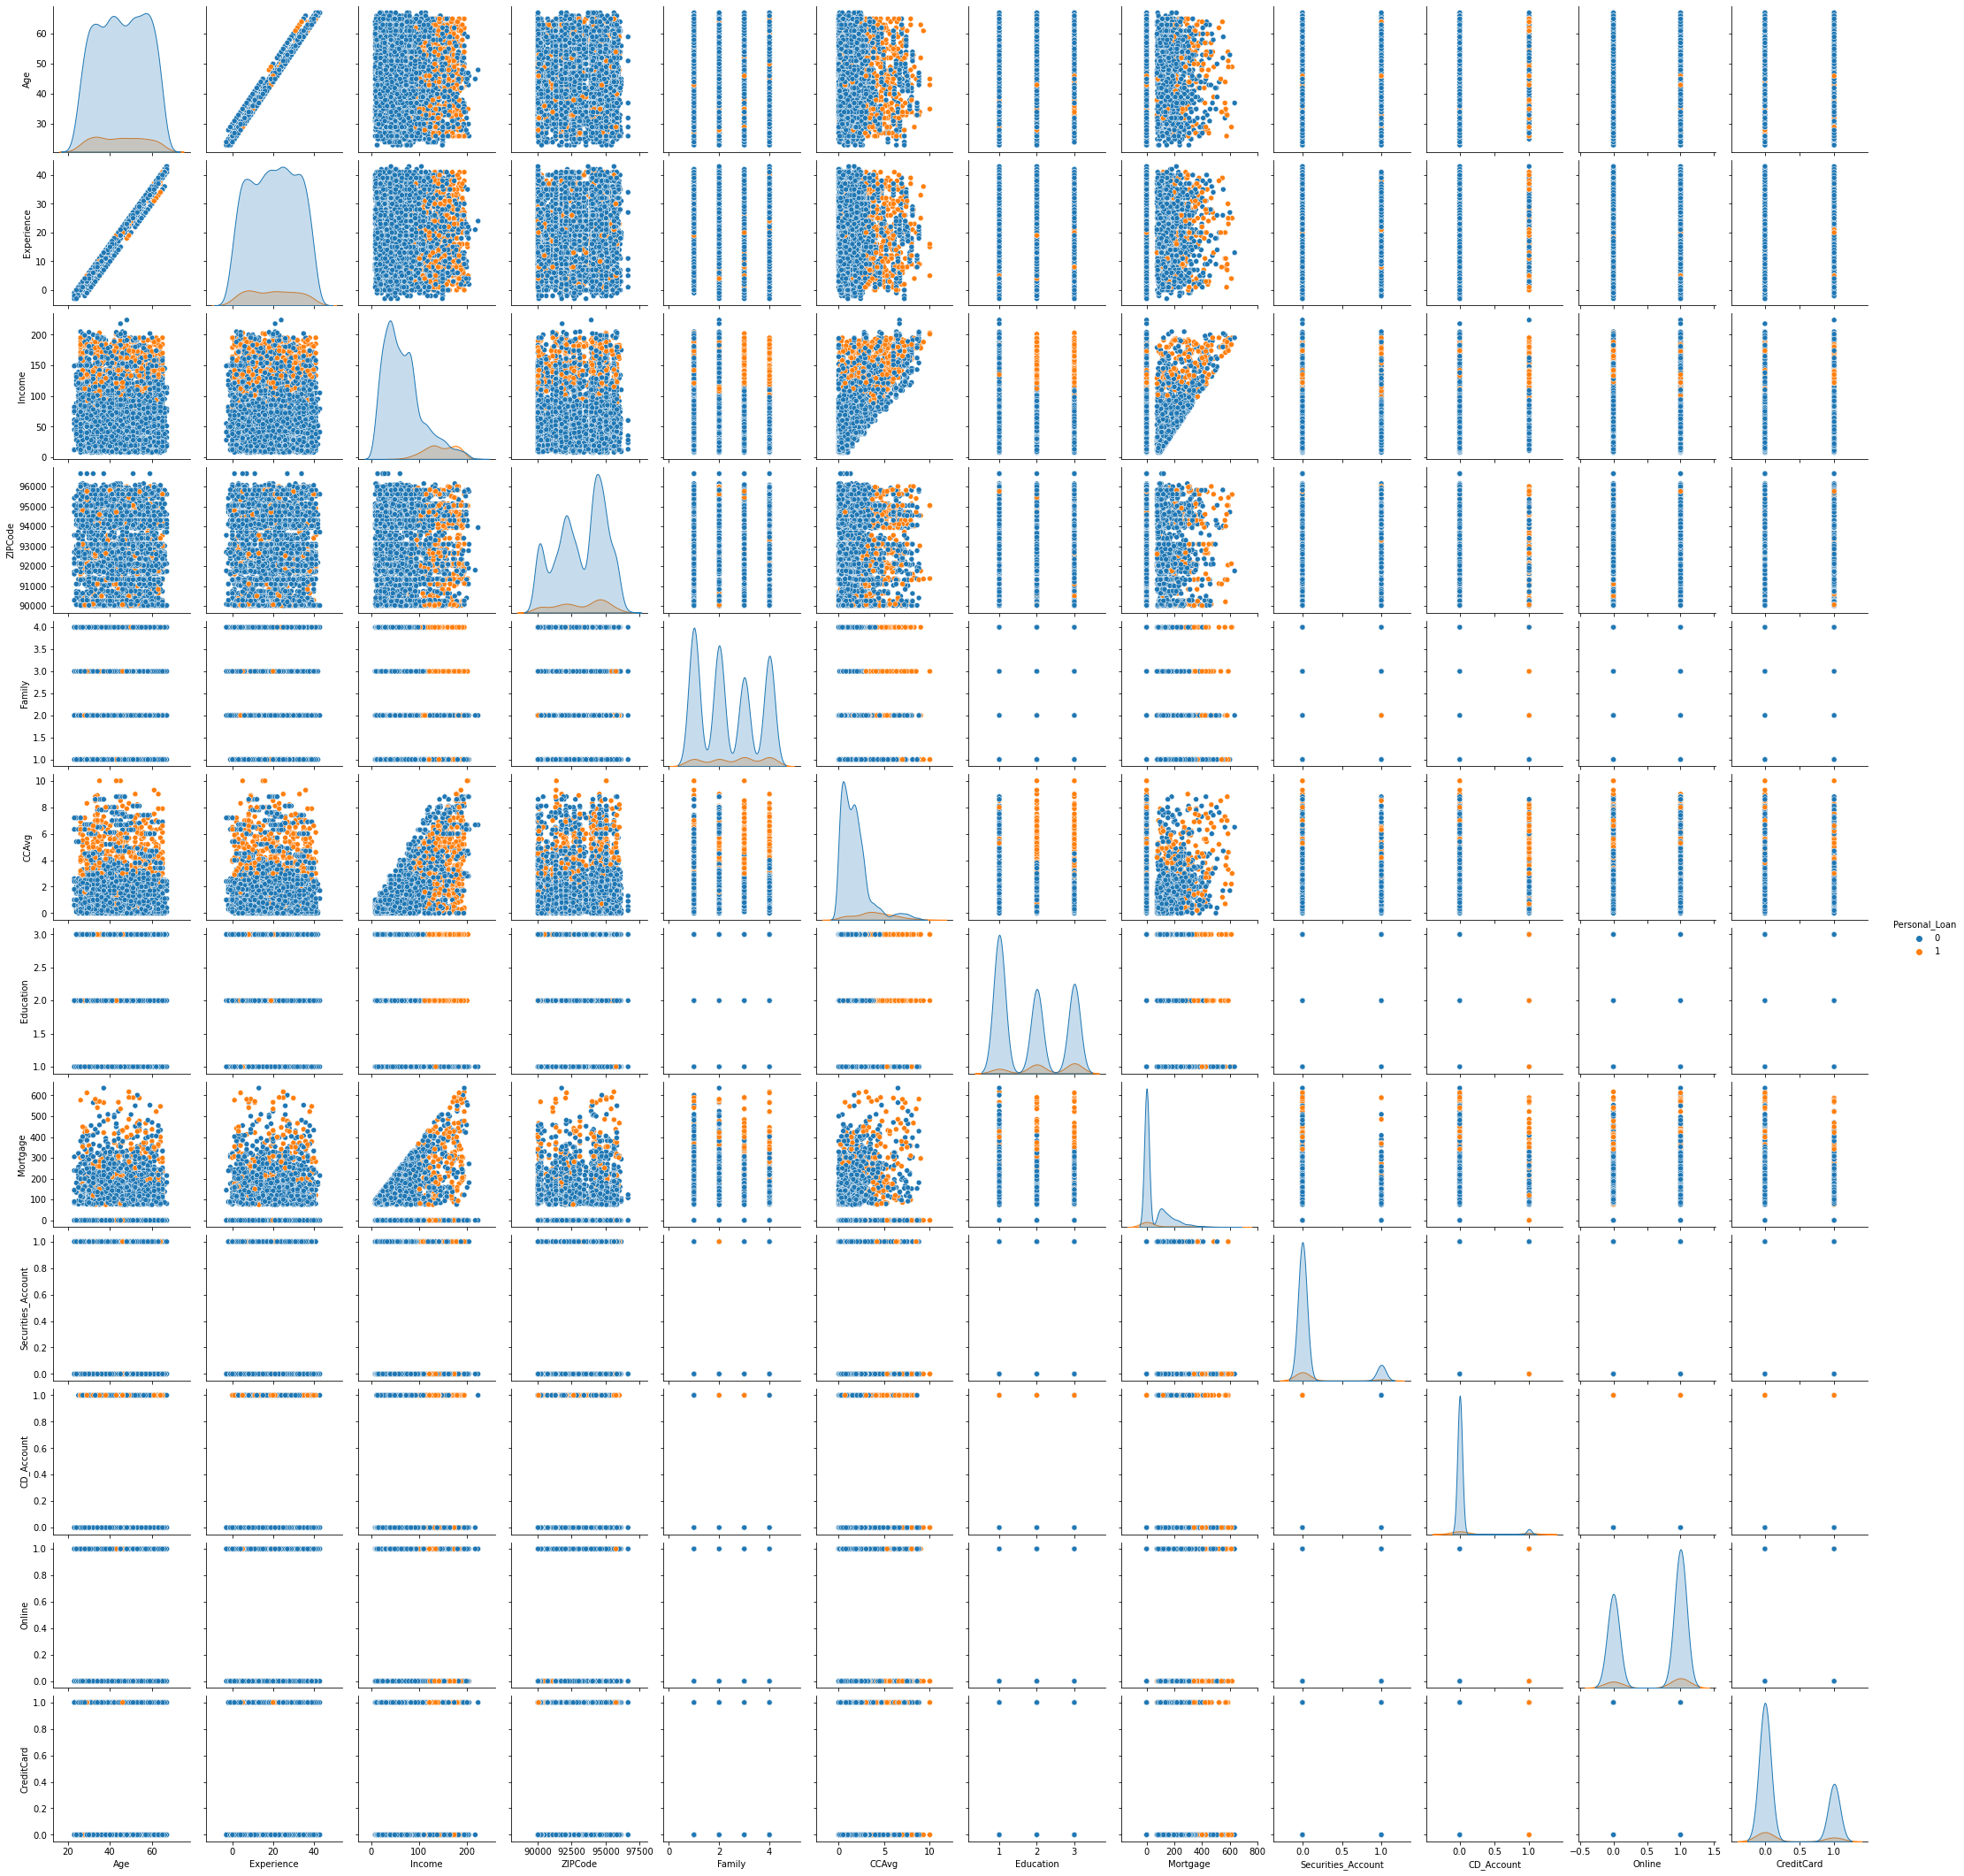

In [47]:
sns.pairplot(data=data, hue="Personal_Loan")
plt.show()

# Split the Data

In [48]:
X = data.drop("Personal_Loan", axis=1)
y = data.pop("Personal_Loan")

In [49]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,...,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County
0,25,1,49,91107,4,1.6,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

# Shape of the Data

In [51]:
print(X_train.shape, X_test.shape)

(3500, 51) (1500, 51)


In [52]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


In [53]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


Here Recall is needed as we do not want loss of customers by predicted the number of flase negatives, we need to reduce that

In [54]:
def get_recall_score(model, predictors, target):
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [55]:
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [56]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,...,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County
0,25,1,49,91107,4,1.6,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Build decision tree model

In [57]:
model = DecisionTreeClassifier(criterion="gini",class_weight={0: 0.1, 1: 0.9}, random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=1)

## Performance on training set

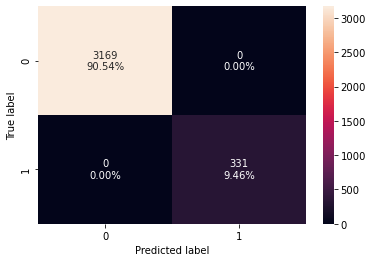

In [58]:
confusion_matrix_sklearn(model, X_train, y_train)


In [59]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


Here model performs well on training set

This leads to overfitting as decision tree will fail to replicate this on test set

## Performance on test set

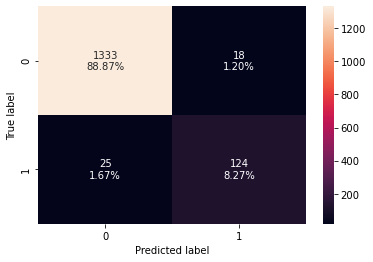

In [60]:
confusion_matrix_sklearn(model, X_test, y_test)

In [61]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.8322147651006712


There is a significant amount of difference here

# Visualising Decision Tree

In [62]:
feature_names = X_train.columns.to_list()


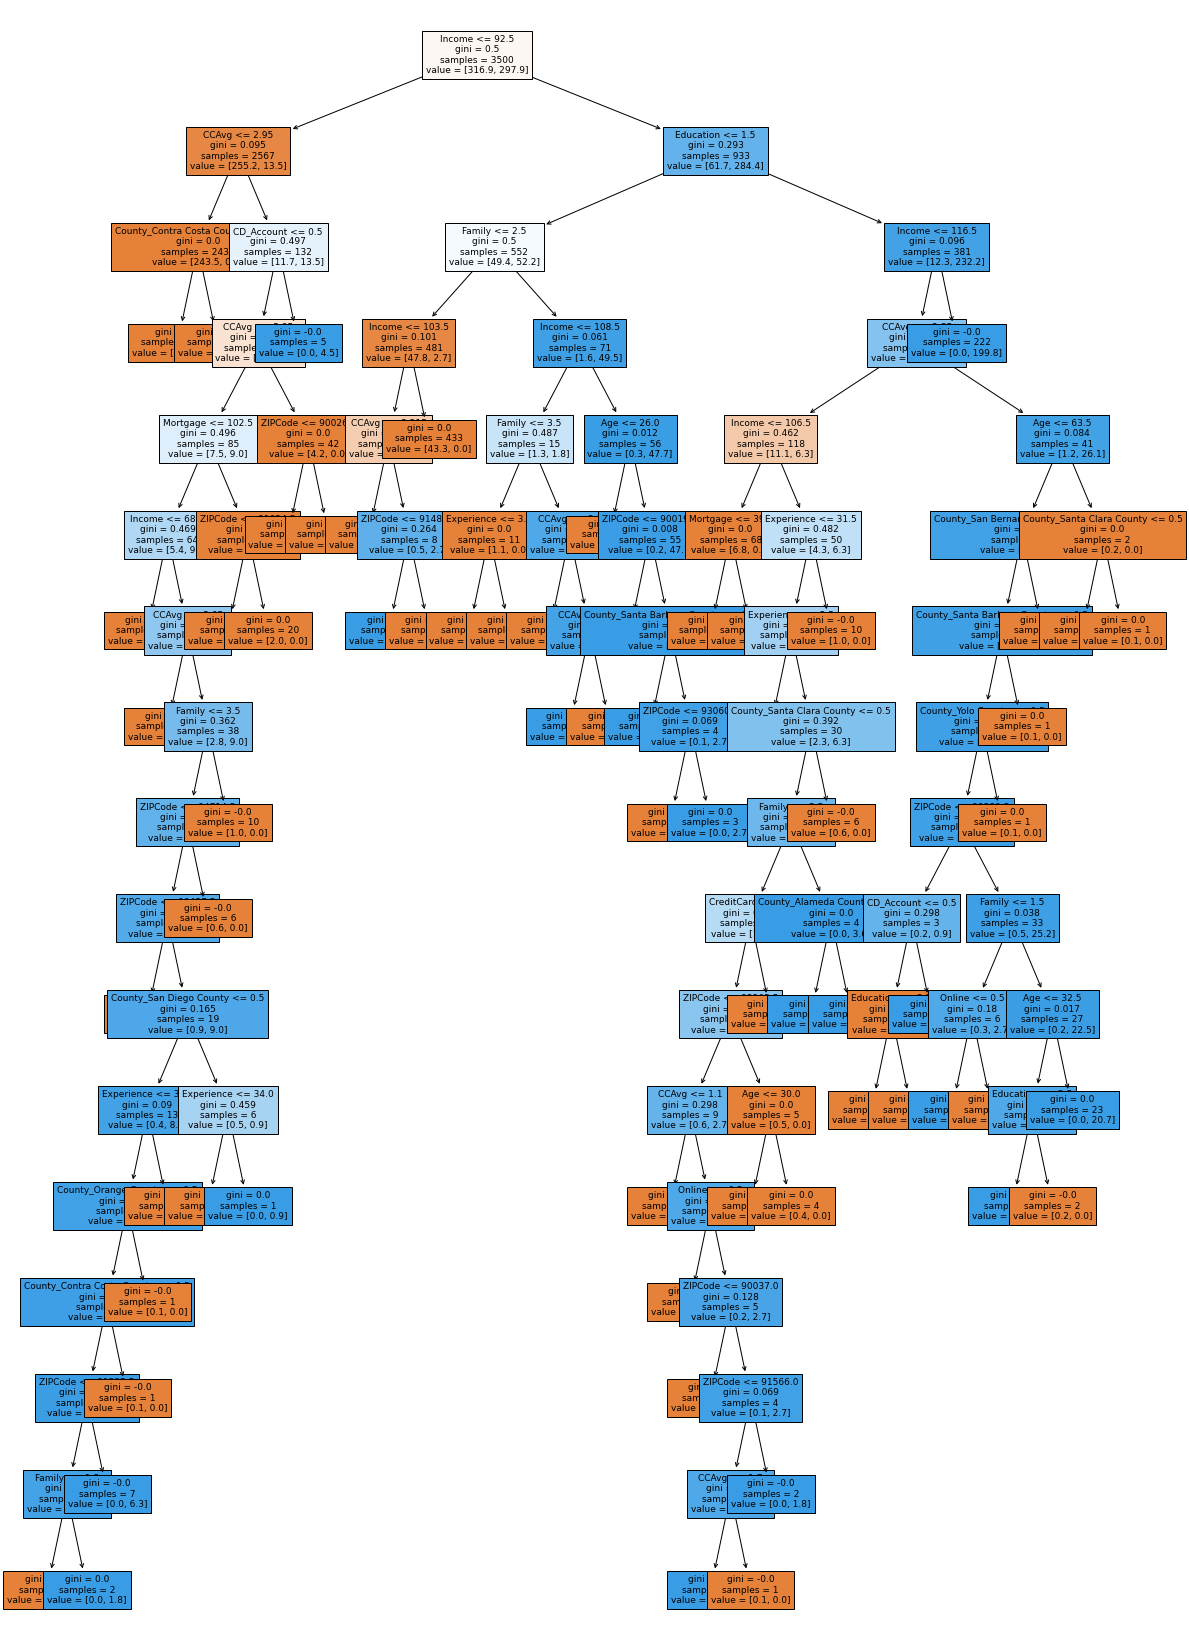

In [63]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [64]:
print(tree.export_text(model, feature_names=feature_names, show_weights=True))


|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- County_Contra Costa County <= 0.50
|   |   |   |--- weights: [239.70, 0.00] class: 0
|   |   |--- County_Contra Costa County >  0.50
|   |   |   |--- weights: [3.80, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |--- weights: [1.50, 0.00] class: 0
|   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [1.10, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |--- ZIPCode <= 94714.50
|   |   |   |   |   |   |   |   |   |--- ZIPCode <= 90437.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- ZIPCode >  90437.50
|   |   |   |   |   |   |   |   |   |   |

The above tree is too lengthy and is overfitting

In [65]:

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
Income                         6.270082e-01
Family                         1.491205e-01
Education                      8.999272e-02
CCAvg                          8.883575e-02
ZIPCode                        1.118976e-02
CD_Account                     8.756164e-03
Experience                     8.362548e-03
Mortgage                       4.662287e-03
Online                         2.304042e-03
County_Santa Clara County      2.254161e-03
Age                            1.962519e-03
CreditCard                     1.703663e-03
County_San Diego County        7.526823e-04
County_Santa Barbara County    6.327061e-04
County_Contra Costa County     6.277970e-04
County_Yolo County             6.153682e-04
County_Orange County           6.128494e-04
County_San Bernardino County   6.063021e-04
County_Alameda County          5.205756e-18
County_San Joaquin County      0.000000e+00
County_San Luis Obispo County  0.000000e+00
County_San Mateo County        0

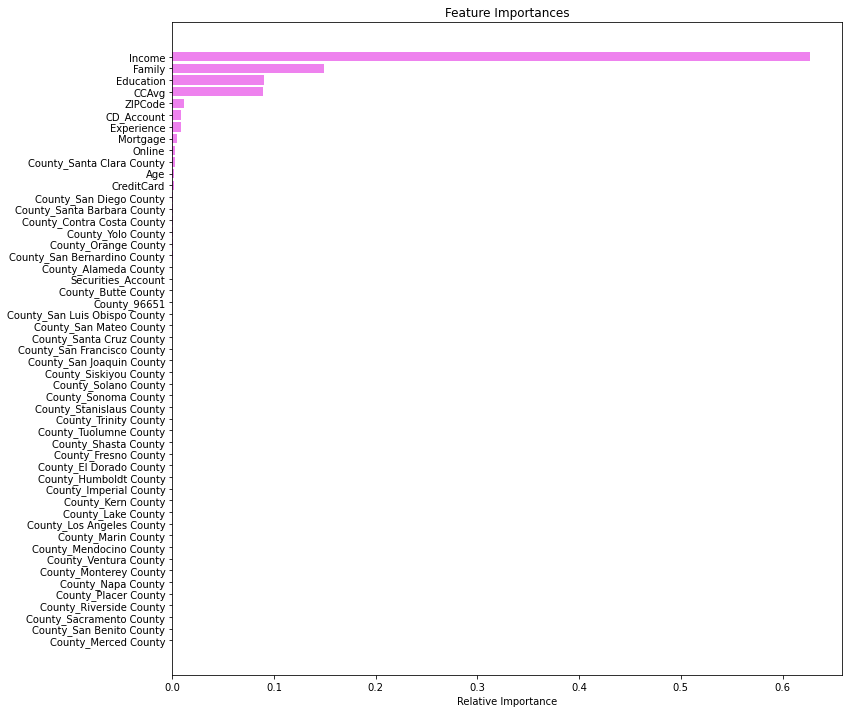

In [66]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

According to the model Income is the most important variable for predicting Perosnal Loans 

# Using GridSearch for Hyperparameter tuning of our tree model¶


In [67]:
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.1, 1: 0.9})

# Grid of parameters to choose from

parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=5,
                       min_impurity_decrease=1e-06, random_state=1)

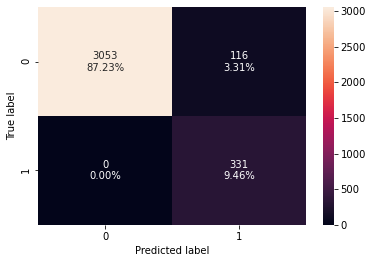

In [68]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [69]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 1.0


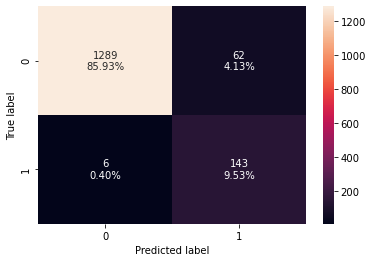

In [70]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [71]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.959731543624161


Test has better recall

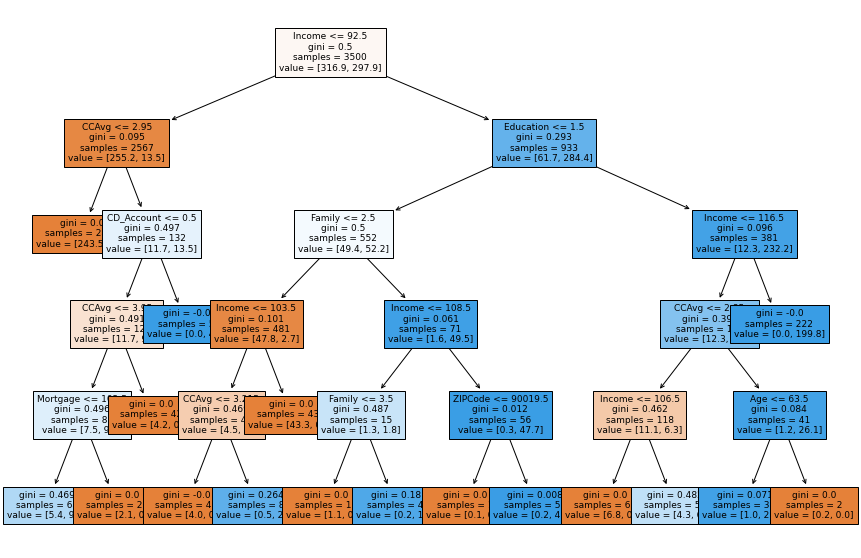

In [72]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [73]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))


|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [243.50, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- weights: [5.40, 9.00] class: 1
|   |   |   |   |--- Mortgage >  102.50
|   |   |   |   |   |--- weights: [2.10, 0.00] class: 0
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [4.20, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 4.50] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 103.50
|   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |--- weights: [0.50, 2.70] class: 1
|   |   |   |--- Income >  103.50
|   |   |   |   |--- weights: [43.30, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 108.50
|   |   |   |   |--- Family 

In [74]:
##commment

In [75]:
print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
Income                         0.655602
Family                         0.149803
Education                      0.093506
CCAvg                          0.086144
CD_Account                     0.008096
Mortgage                       0.004908
Age                            0.001263
ZIPCode                        0.000678
County_Sacramento County       0.000000
County_Santa Clara County      0.000000
County_San Benito County       0.000000
County_San Bernardino County   0.000000
County_San Diego County        0.000000
County_San Francisco County    0.000000
County_San Joaquin County      0.000000
County_San Luis Obispo County  0.000000
County_San Mateo County        0.000000
County_Santa Barbara County    0.000000
County_Solano County           0.000000
County_Santa Cruz County       0.000000
County_Shasta County           0.000000
County_Siskiyou County         0.000000
County_Placer County           0.000000
County_Sonoma County           0.000000


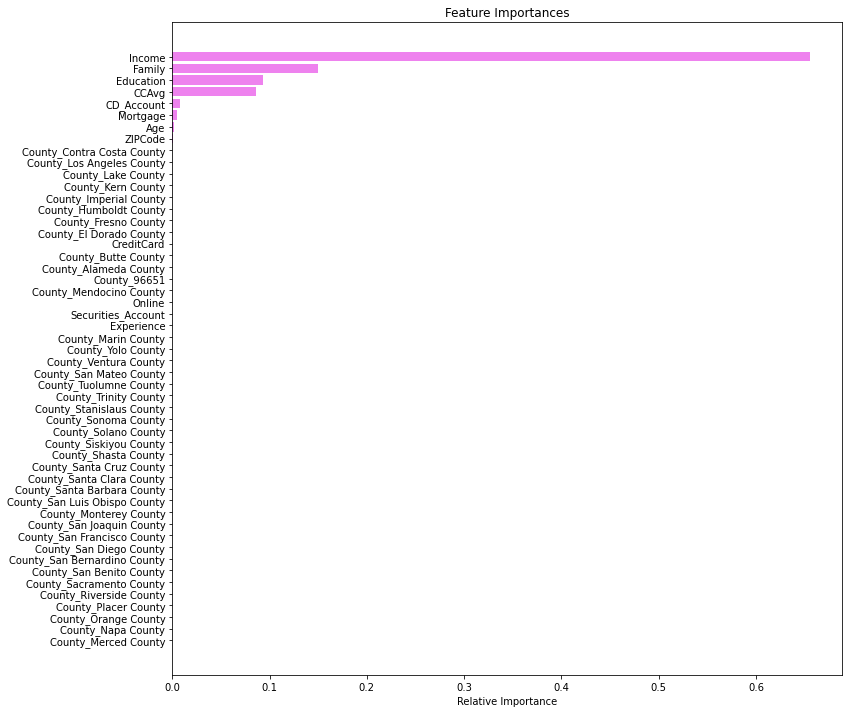

In [76]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Cost Complexity Pruning

In [77]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.1, 1: 0.9})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [78]:
pd.DataFrame(path)


,ccp_alphas,impurities
0,0.000000e+00,-1.757341e-15
1,1.805828e-19,-1.757161e-15
2,1.805828e-18,-1.755355e-15
3,2.600392e-18,-1.752755e-15
4,3.575539e-18,-1.749179e-15
5,9.029140e-18,-1.740150e-15
6,2.275343e-17,-1.717397e-15
7,3.438296e-17,-1.683014e-15
8,2.419448e-16,-1.441069e-15
9,5.364573e-15,3.923504e-15


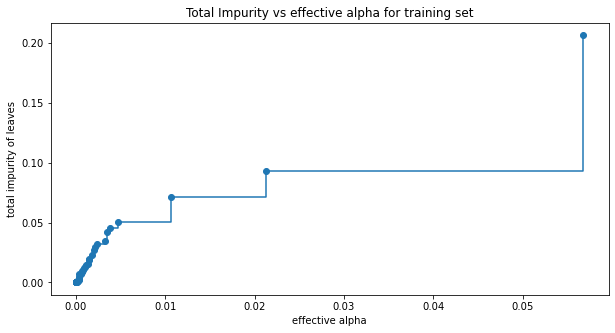

In [79]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()


In [80]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha,class_weight={0: 0.1, 1: 0.9}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29287854019800125


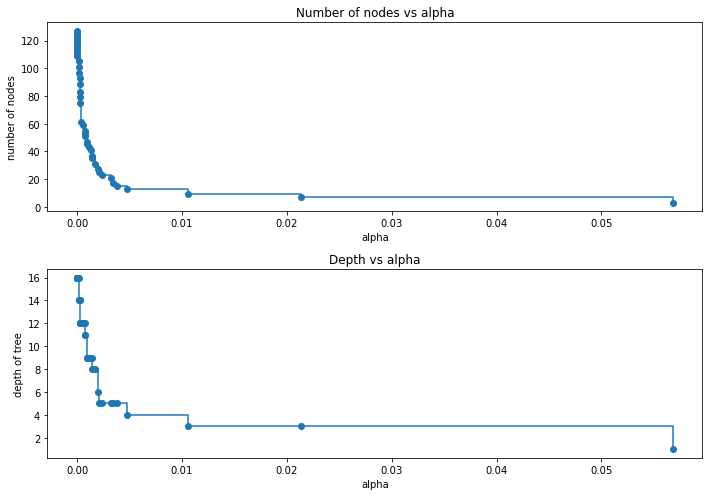

In [81]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [82]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [83]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [84]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

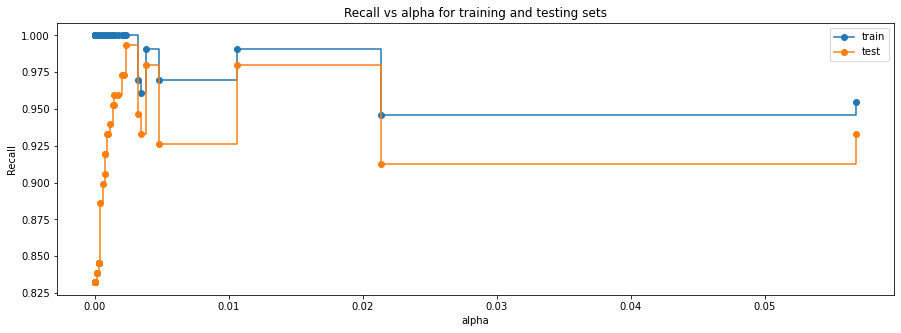

In [85]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [86]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0023289170166201755,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)


In [87]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0023289170166201755,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)

## Performance on Training set

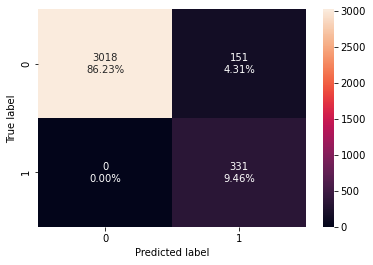

In [88]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [89]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))


Recall Score: 1.0


# Performance on Test Set

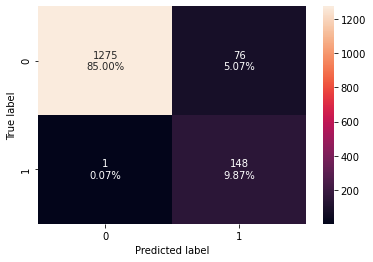

In [90]:
confusion_matrix_sklearn(best_model, X_test, y_test)


In [91]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))


Recall Score: 0.9932885906040269


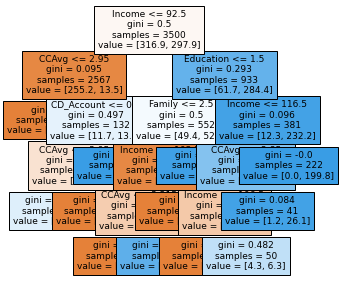

In [92]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

# Model with 0.003 alpha

In [93]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.003, class_weight={0: 0.1, 1: 0.9}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.003, class_weight={0: 0.1, 1: 0.9},
                       random_state=1)

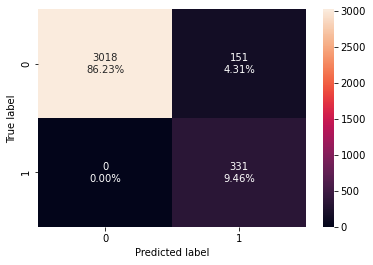

In [94]:
confusion_matrix_sklearn(best_model2, X_train, y_train)


In [95]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 1.0


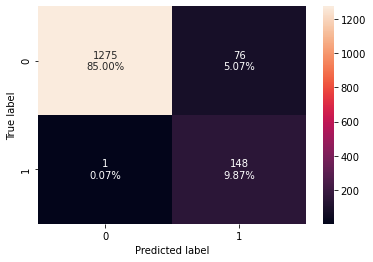

In [96]:
confusion_matrix_sklearn(best_model2, X_test, y_test)


In [97]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)


Recall Score: 0.9932885906040269


 We see a recall score with way better performance
 
 We can now compare all the three models

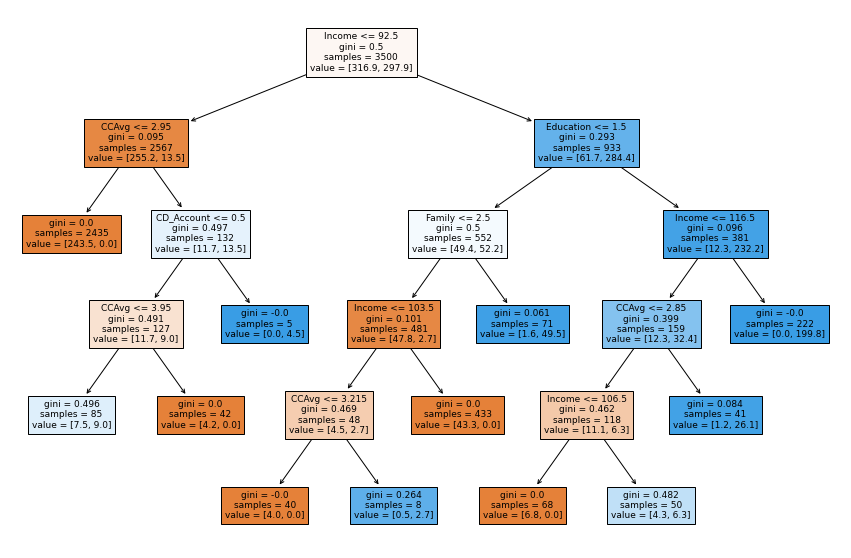

In [98]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [99]:
print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))


|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [243.50, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [7.50, 9.00] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [4.20, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 4.50] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 103.50
|   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |--- weights: [0.50, 2.70] class: 1
|   |   |   |--- Income >  103.50
|   |   |   |   |--- weights: [43.30, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.60, 49.50] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.85
|   |   |   |   |--- Income <= 106.50
|   |   |   |   |   |--- we

In [100]:

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)


                                    Imp
Income                         0.661588
Family                         0.147962
Education                      0.094853
CCAvg                          0.087384
CD_Account                     0.008213
Age                            0.000000
County_Santa Barbara County    0.000000
County_Riverside County        0.000000
County_Sacramento County       0.000000
County_San Benito County       0.000000
County_San Bernardino County   0.000000
County_San Diego County        0.000000
County_San Francisco County    0.000000
County_San Joaquin County      0.000000
County_San Luis Obispo County  0.000000
County_San Mateo County        0.000000
County_Shasta County           0.000000
County_Santa Clara County      0.000000
County_Santa Cruz County       0.000000
County_Orange County           0.000000
County_Siskiyou County         0.000000
County_Solano County           0.000000
County_Sonoma County           0.000000
County_Stanislaus County       0.000000


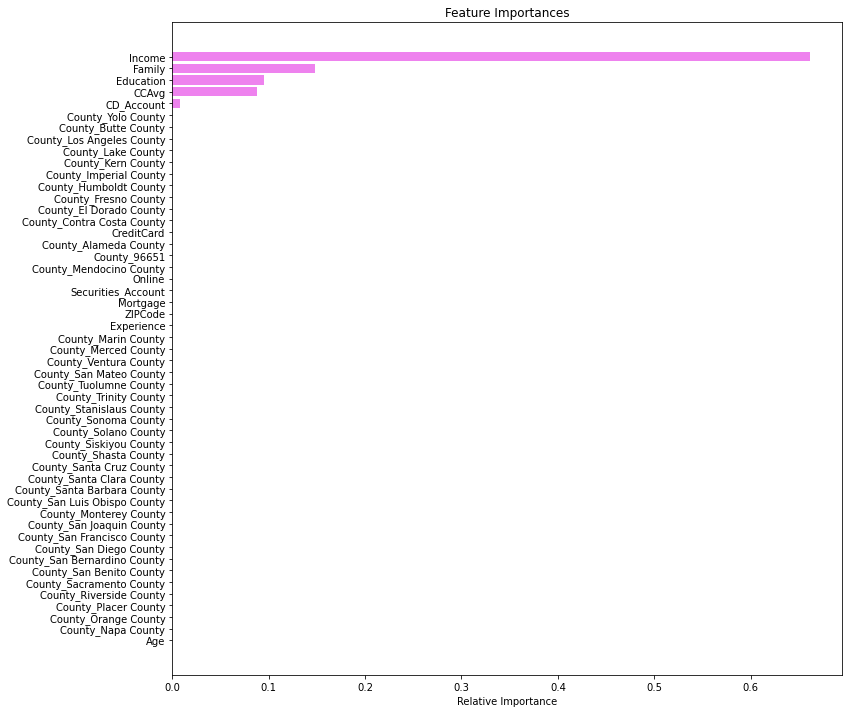

In [101]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Income and family are the two most important features to predict customers taking out personal loans

# Comparing all three models

In [102]:

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df


Training performance comparison:


,Recall on training set
0,1.0
1,1.0
2,1.0


In [103]:
models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Recall on testing set
0,0.832215
1,0.959732
2,0.993289


The post pruned data set gives the best results

Althought the values for recall on the test set for pre-prunned and post pruned trees are similar

# Conclusion

The analysis of the users and their probability of purchasing the loan was analyzed

The model built can be used to see if the user will contribute towards taking a loan

Different trees, bar plots and confusion matrix helped us understand the model better

The importance of hyperparameters, and pruning was shown here

Income, family, CCAvg, CD_Account and education are the most importaant variables in predicting the customers for loans

# Recommendations
If the income is above $92500, there is a high chance that the user will not take a loan

If the user has income less than $92500  and has credit card expenditure over 2950; the probablity of the user taking a loan is high

Offer low intrest rates to attract customers

Target the customers witha high credit card usage and lower income in order to gain of the intrest

Use the predictive model to see potential users who would take the loan
